In [1]:
# Let's import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score # to split data into training and testing
from sklearn.preprocessing import StandardScaler, LabelEncoder # to encode catogorical data into numerical data, and standard scaler to scale the data
from sklearn.neighbors import KNeighborsClassifier # this is the classifier we will be using for model building
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score # we will use these to check the scores of the model

In [2]:
#This the data we will be using. We will try to identify the species of flower with the help of given data.
d = pd.read_csv("/content/drive/MyDrive/Input/Iris.csv")
d.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# We need to encode the data in order to convert teh categorical columns into numerical or Binary
en = LabelEncoder()
d['Species'] = en.fit_transform(d['Species'])
d.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [4]:
# We will te spliting the data into training and testing, so let's seprate the dependent and independent columns and remove Identifiable information
x = d.drop(["Species", 'Id'], axis = 1)
y = d["Species"]

In [5]:
# This is train test split for the model.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state = 50, test_size = 0.3, stratify = y)


In [6]:
# We will use Standard scaler to scale the data. We will not be scaling ytrain and ytest. These 2 contains species column in them and they are used for as labels in KNN
# rest of the data requires scaling because KNN uses these column values for distance calculation, so they all have to be in the same scale for the algorithm to work properly.
sc = StandardScaler()
xtrain_scaled = sc.fit_transform(xtrain)
xtest_scaled = sc.transform(xtest)

Now, we will be calculating the number of neighbors for KNN.
 To do this, we wil first run the model in loops and get the error data i.e., the mismatched ones. Based on the error data, we will have a range of numbers that we can use for neighbor parameter. We will again run the model in loops with the range we have obtained and then calculate the mean accuracy to get the final number of neighbor parameter.

class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)



In [7]:
# running the model in loops to get the initial range of neighbor parameter
err = []
for i in range(1,40):
  mod = KNeighborsClassifier(n_neighbors = i, weights='distance', n_jobs = -1 )
  mod.fit(xtrain_scaled, ytrain)
  ypred = mod.predict(xtest_scaled)
  err.append(np.mean(ypred != ytest))


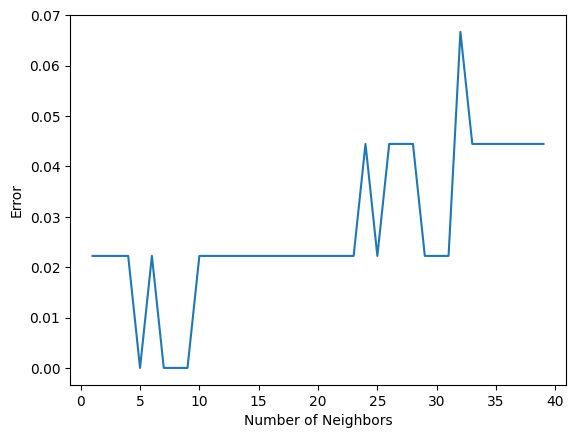

In [8]:
# Plotting the number of neighbours with error
plt.plot(range(1,40), err)
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

In [9]:
# Running the model again in loops to find the exact number of neighbour parameter
k = range(1,23)
score = []
for neigh in k:
  mod1 = KNeighborsClassifier(n_neighbors = neigh, weights = 'distance', n_jobs = -1)
  scores = cross_val_score(mod1, xtrain_scaled, ytrain, scoring = 'accuracy', n_jobs= -1)
  score.append(scores.mean())

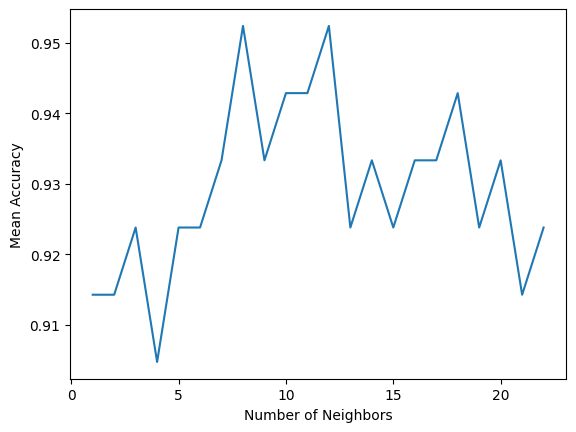

In [10]:
# Plotting the number of neighbor with mean accuracy
plt.plot(k, score)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Accuracy')
plt.show()

In [11]:
# Final model creation with n_neighbors between 6 and 8, so I decided to go with 7
mod_final = KNeighborsClassifier(n_neighbors= 7, n_jobs= -1, weights = 'distance')
mod_final.fit(xtrain_scaled, ytrain)
print("Training score :", mod_final.score(xtrain_scaled, ytrain))
ypred_final = mod_final.predict(xtest_scaled)
print("Testing score :", accuracy_score(ytest, ypred_final))

Training score : 1.0
Testing score : 1.0


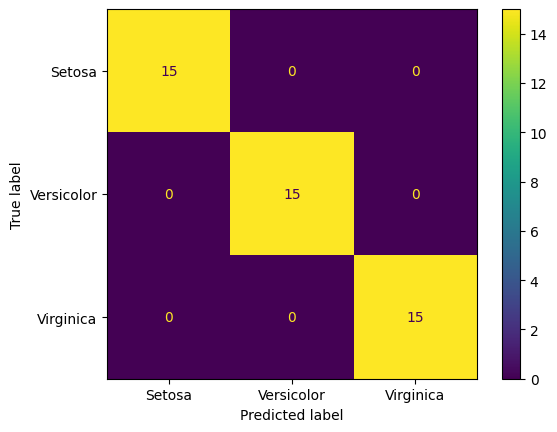

In [22]:
display_cm = ConfusionMatrixDisplay.from_predictions(ytest, ypred_final, display_labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()

In [13]:
# Earlier we used 'distance' weights, this time, we will use 'uniform' in weights parameter.
errx = []
for i in range(1,40):
  modx = KNeighborsClassifier(n_neighbors = i, weights='uniform', n_jobs = -1 )
  modx.fit(xtrain_scaled, ytrain)
  ypredx = modx.predict(xtest_scaled)
  errx.append(np.mean(ypredx != ytest))
# 'uniform’ : uniform weights. All points in each neighborhood are weighted equally.
# ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.


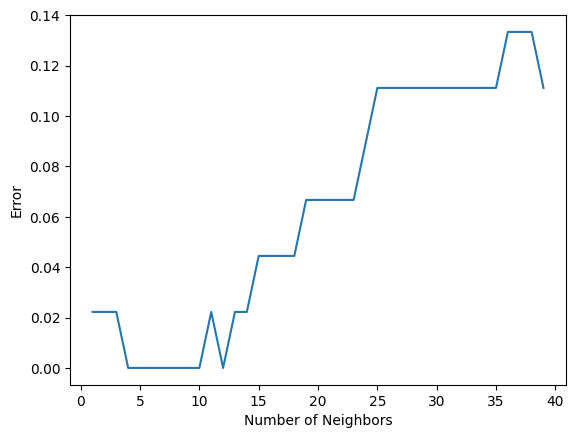

In [14]:
plt.plot(range(1,40), errx)
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()